In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

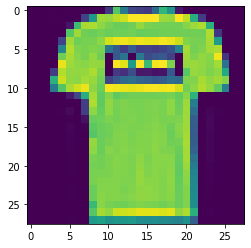

In [3]:
plt.imshow(X_train[1])

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train= X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28,28,1))

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [8]:
model = Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same' , activation=keras.layers.LeakyReLU(alpha=0.001), input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(Dropout(0.2))

model.add(keras.layers.Conv2D(64, (3, 3),strides = 1, padding = 'same', activation=keras.layers.LeakyReLU(alpha=0.001)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(Dropout(0.2))

model.add(keras.layers.Conv2D(128, (3, 3),strides = 1, padding = 'same', activation=keras.layers.LeakyReLU(alpha=0.001)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(Dropout(0.2))


model.add(keras.layers.Flatten())

model.add(Dense(128,activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.2))

model.add(Dense(128,activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.2))

model.add(Dense(10, activation= 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [10]:
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
   )

In [20]:
model_history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/10
1500/1500 [==============================] - 109s 73ms/step - loss: 0.1500 - accuracy: 0.9466 - val_loss: 0.2327 - val_accuracy: 0.9259
Epoch 2/10
1500/1500 [==============================] - 108s 72ms/step - loss: 0.1425 - accuracy: 0.9466 - val_loss: 0.2269 - val_accuracy: 0.9269
Epoch 3/10
1500/1500 [==============================] - 109s 73ms/step - loss: 0.1424 - accuracy: 0.9480 - val_loss: 0.2307 - val_accuracy: 0.9257
Epoch 4/10
1500/1500 [==============================] - 109s 73ms/step - loss: 0.1376 - accuracy: 0.9500 - val_loss: 0.2312 - val_accuracy: 0.9252
Epoch 5/10
1500/1500 [==============================] - 109s 72ms/step - loss: 0.1415 - accuracy: 0.9488 - val_loss: 0.2283 - val_accuracy: 0.9255
Epoch 6/10
1500/1500 [==============================] - 109s 73ms/step - loss: 0.1436 - accuracy: 0.9471 - val_loss: 0.2245 - val_accuracy: 0.9287
Epoch 7/10
1500/1500 [==============================] - 108s 72ms/step - loss: 0.1433 - accuracy: 0.9485 - val_loss: 0

In [21]:
ev = model.evaluate(X_test,y_test)
ev

313/313 [==============================] - 8s 24ms/step - loss: 0.2699 - accuracy: 0.9209


[0.269936740398407, 0.9208999872207642]

In [22]:
print ('Test Loss ', ev[0])
print ('Test accuracy', ev[1])

Test Loss  0.269936740398407
Test accuracy 0.9208999872207642


In [23]:
print('The accuracy is ', ev[1]*100)

The accuracy is  92.08999872207642
